(ecosystem)=
# Ecosystem 

### **The St. Crispin’s Day Speech as a Loss Function Optimization Problem**  

Shakespeare’s *Henry V* delivers one of the most compelling psychological maneuvers in wartime rhetoric: the assertion that fewer soldiers make for a greater victory, that if they die, they are no more than the country can afford to lose, and if they live, their honor will be unmatched. At first glance, the speech reads as a rousing call to arms, a poetic sleight of hand meant to elevate morale in the face of near-certain death. However, if we step back and frame this speech in terms of modern optimization theory, we see that Henry’s argument is not just rhetorical brilliance—it is a strategic loss function engineered to align individual incentives with national survival.  

A loss function quantifies the tradeoffs between competing objectives, allowing us to determine an optimal decision given constraints. In this case, we can identify two competing loss functions operating at different levels: one at the national level, where England must minimize the cost of battle while maximizing the probability of victory, and one at the individual level, where each soldier must weigh their personal risk of death against the potential for immortal honor. These functions can be formalized as follows.  

<div style="display: flex; justify-content: center;">
    <iframe width="80%" height="400px" src="https://www.youtube.com/embed/1VRCfuKEGdo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>

```{figure} https://www.ledr.com/colours/white.jpg
---
width: 1%
name: RIP DEI 
---
_It Takes AI to Curate Data to Train AI_. Isaiah 2:2-4 is the best quoted & also misunderstood article on the conditions of social harmony. Putnams discomforts with the data tells us that he was surprised by what the UN knew half a century earlier and what our biblical prophet articulated several millenia ago. Putnam published his data set from this study in 2001 and subsequently published the full paper in 2007. Putnam has been criticized for the lag between his initial study and his publication of his article. In 2006, Putnam was quoted in the Financial Times as saying he had delayed publishing the article until he could "develop proposals to compensate for the negative effects of diversity" (quote from John Lloyd of Financial Times). In 2007, writing in City Journal, John Leo questioned whether this suppression of publication was ethical behavior for a scholar, noting that "Academics aren't supposed to withhold negative data until they can suggest antidotes to their findings." On the other hand, Putnam did release the data in 2001 and publicized this fact. Source: [Wikipedia](https://en.wikipedia.org/wiki/Robert_D._Putnam#Diversity_and_trust_within_communities)
```

For the nation, the cost of war is defined as the probability of defeat multiplied by the strategic cost of that loss, plus the probability of victory multiplied by the expected number of casualties:  

$$
\mathcal{L}_{\text{country}} = p(\text{defeat}) \cdot C_{\text{strategic loss}} + p(\text{victory}) \cdot C_{\text{casualties}}
$$

The fewer soldiers who fight, the greater the risk of defeat, increasing $ p(\text{defeat}) $. Conversely, a higher number of soldiers reduces this probability but increases expected casualties, creating a tradeoff. Henry’s speech implicitly suggests that the army already represents an optimal balance—adding more men would dilute honor without significantly improving victory odds.  

At the individual level, each soldier faces their own risk-reward calculation. Honor is inversely proportional to the number of surviving fighters; the fewer who share in the victory, the greater each individual’s share of glory. However, this must be weighed against the probability of death. We model the honor function as:  

$$
H_{\text{individual}} = \frac{H_{\text{total}}}{N_{\text{fighters}}} - \lambda \cdot p(\text{death})
$$

where $ H_{\text{total}} $ is the total glory from the battle, distributed among $ N_{\text{fighters}} $, and $ \lambda $ is a weighting factor representing the soldier’s aversion to death. The speech’s psychological trick lies in amplifying the perceived value of $ H_{\text{total}} $, making even a high probability of death appear an acceptable tradeoff.  

To translate this theoretical framework into an operational model, we construct a neural network that encodes these decision layers. The network is structured in five hierarchical levels: Suis, the static belief system; Voir, the information processing layer; Choisis, the decision-making layer; Deviens, which accounts for battlefield adversities; and M’élève, representing final outcomes such as mortality, frailty, and hospitalization. Each node interacts probabilistically, propagating information and decisions through a structured belief system.  

At the core of this network lies an information-processing node that determines how beliefs translate into action. We assign probabilities to each decision path, encoding the tradeoffs between risk and reward. For instance, the probability of a soldier fighting despite a high risk of death is increased by boosting the expected honor payoff. This is captured mathematically by the edge weight ratios:  

| **Edge**                     | **Weight (P:Q Probability Ratio)** |
|------------------------------|------------------------------------|
| Fewer Men → Information      | 1:99 (low probability of many survivors) |
| Greater Honor → Information  | 5:95 (high honor is rare but possible) |
| And If To Live → Information | 20:80 (probability of survival) |
| Country Loss → Information   | 51:49 (almost balanced uncertainty) |
| If We Are Mark’d → Information | 80:20 (strong pre-destined belief) |
| To Die, We Enough → Information | 95:5 (certainty in sacrifice) |

These weights encode the psychological calculus of war: the more likely death is, the stronger the justification for it being an "honorable" loss.  

By modeling honor as an exponentially increasing function of scarcity, Henry ensures that desertion becomes suboptimal. A rational soldier stays in the battle if:  

$$
e^{k/N} > p(\text{death}) \cdot C_{\text{expected loss}}
$$

which implies that, if the speech succeeds in elevating $ H_{\text{total}} $ sufficiently, even an overwhelming probability of death can be justified. This represents a cooperative equilibrium, where defecting (fleeing) provides no honor, and staying offers the possibility of immortality, albeit at great risk.  

```{figure} https://upload.wikimedia.org/wikipedia/commons/6/68/Thinktank_Birmingham_-_Trevithick_Locomotive%281%29.jpg
---
width: 100%%
name: Nvidia's Jensen Huang 
---
_Flywheel_. CUDA is that thing already. From human programming (static software) to machine programming (dynamic landscape), ecosystem-cost of chips becomes more important than the quality of the chips. Holistic improvements rather than improvement of specific steps in the flywheel process are crucial. Combinatorial advantage (parallel-domain.specific transisters vs. serial-high performance from individual transister) Source: [Wikipedia](https://en.wikipedia.org/wiki/Flywheel)
```

Henry’s speech thus functions as a perfect optimization algorithm, aligning the incentives of individuals with the needs of the state. By reframing survival as secondary to legacy, he forces the soldier into a decision landscape where the logical choice—given the speech’s framing—is to fight. The brilliance of this lies in its information-theoretic compression: Shakespeare reduces battlefield uncertainty into a structured belief system, updating prior probabilities to ensure cohesion.  

Thus, *Henry V* is not merely a play—it is an early exploration of reinforcement learning under extreme constraints. The St. Crispin’s Day speech is not just a call to arms, but a loss function, precisely engineered to maximize national survival by modulating individual decision-making.
 


 



 
 

 

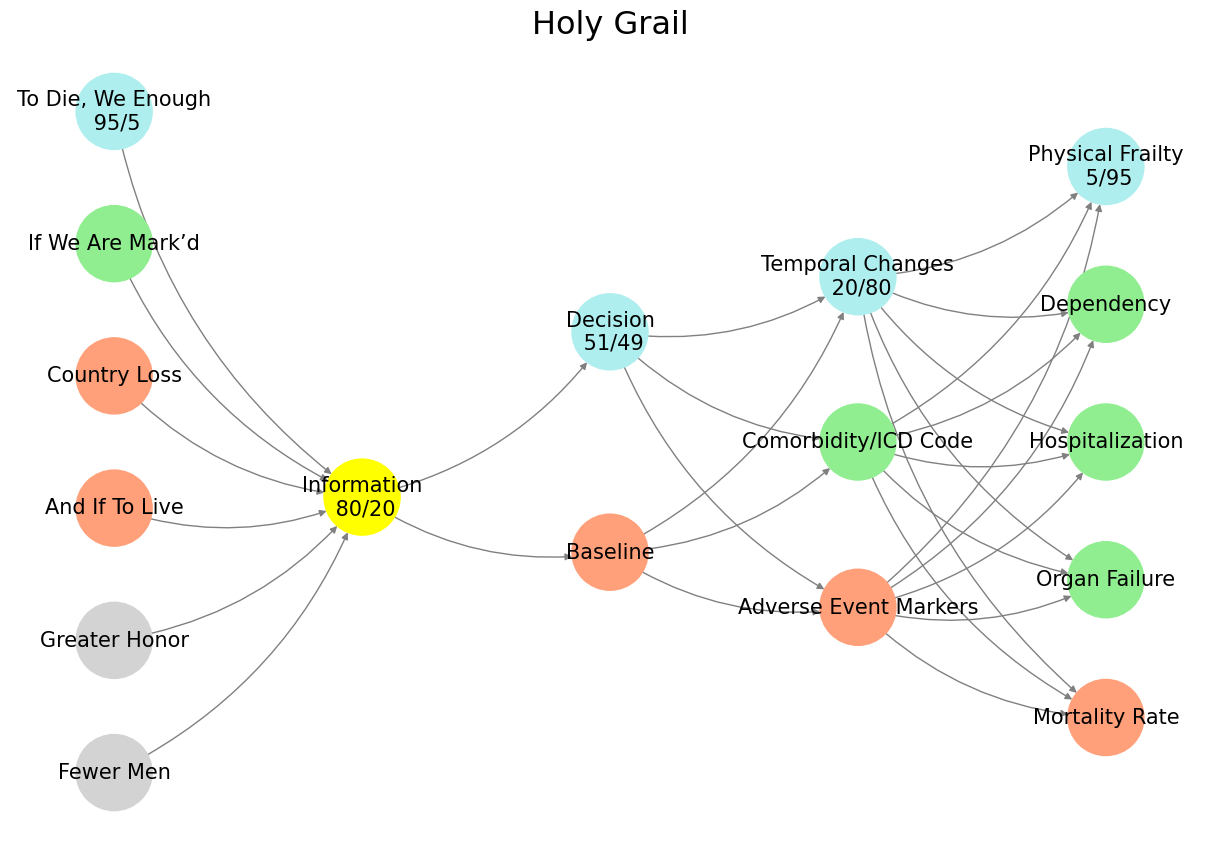

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network fractal
def define_layers():
    return {
        'Suis': ['Fewer Men', 'Greater Honor', 'And If To Live', 'Country Loss', "If We Are Mark’d", 'To Die, We Enough\n 95/5', ], # Static
        'Voir': ['Information\n 80/20'],  
        'Choisis': ['Baseline', 'Decision\n 51/49'],  
        'Deviens': ['Adverse Event Markers', 'Comorbidity/ICD Code', 'Temporal Changes\n 20/80'],  
        "M'èléve": ['Mortality Rate', 'Organ Failure',  'Hospitalization', 'Dependency', 'Physical Frailty\n 5/95']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = { # Dynamic
        'yellow': ['Information\n 80/20'],  
        'paleturquoise': ['To Die, We Enough\n 95/5', 'Decision\n 51/49', 'Temporal Changes\n 20/80', 'Physical Frailty\n 5/95'],  
        'lightgreen': ["If We Are Mark’d", 'Comorbidity/ICD Code', 'Organ Failure', 'Dependency', 'Hospitalization'],  
        'lightsalmon': [
            'And If To Live', 'Country Loss', 'Baseline',  
            'Adverse Event Markers', 'Mortality Rate'
        ],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate positions for nodes
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))   

    # Add edges (automated for consecutive layers)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer, target_layer = layer_names[i], layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=15, connectionstyle="arc3,rad=0.2"
    )
    plt.title("Holy Grail", fontsize=23)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
So we have a banking cartel, private ledgers, balancing payments, network of banks, and satisfied customer. The usurper is a public infrastructure, with open ledgers, digital trails, block-chain network, and liberated customer. Were not the Ethiopians and the Lubims a huge host, with very many chariots and horsemen? yet, because thou didst rely on the Lord, he delivered them into thine hand. For the eyes of the Lord run to and fro throughout the whole earth, to shew himself strong in the behalf of them whose heart is perfect toward him. Herein thou hast done foolishly: therefore from henceforth thou shalt have wars. Source: 2 Chronicles 16: 8-9
```


